## Required Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots for Jupyter
%matplotlib inline

## Load the Data

In [2]:
file_path = "ecommerce_sales_data (1).xlsx"  
data = pd.read_excel(file_path)

In [3]:
data.head()

,TransactionID,StoreID,CustomerID,ProductCategory,ProductPrice,QuantityPurchased,PurchaseDate,CustomerAge,PaymentMethod
0,T00001,S039,C012,Books,24.87,11.0,2024-01-31,72.0,PayPal
1,T00002,S029,NaN,Apparel,133.44,6.0,2023-12-16,55.0,Credit Card
2,T00003,S015,C711,Books,97.18,2.0,2023-11-24,28.0,Credit Card
3,T00004,S043,C577,Home & Kitchen,126.23,11.0,NaN,29.0,Debit Card
4,T00005,S008,NaN,Home & Kitchen,142.13,11.0,2024-04-25,24.0,Debit Card


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      10000 non-null  object 
 1   StoreID            10000 non-null  object 
 2   CustomerID         9497 non-null   object 
 3   ProductCategory    10000 non-null  object 
 4   ProductPrice       9801 non-null   float64
 5   QuantityPurchased  9795 non-null   float64
 6   PurchaseDate       9505 non-null   object 
 7   CustomerAge        9467 non-null   float64
 8   PaymentMethod      10000 non-null  object 
dtypes: float64(3), object(6)
memory usage: 703.3+ KB


In [5]:
# convert the PurchaseDate to datetime datatype
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], errors='coerce')

In [6]:
# display stats of data
data.describe()

,ProductPrice,QuantityPurchased,PurchaseDate,CustomerAge
count,9801.000000,9795.000000,9505,9467.000000
mean,103.912277,10.411843,2024-05-16 15:57:46.680694272,49.096123
min,-103.360000,1.000000,2023-11-15 00:00:00,5.000000
25%,65.430000,5.000000,2024-02-15 00:00:00,34.000000
50%,99.420000,10.000000,2024-05-17 00:00:00,49.000000
75%,134.930000,15.000000,2024-08-17 00:00:00,65.000000
max,1136.970000,20.000000,2024-11-13 00:00:00,100.000000
std,80.123639,5.792729,NaN,18.225228


In [7]:
# Remove rows with negative ProductPrice
data = data[data['ProductPrice'] >= 0]

In [8]:
# Fill missing values for ProductPrice, QuantityPurchased adn CustomerAge
data['ProductPrice'].fillna(data['ProductPrice'].median(), inplace=True)
data['QuantityPurchased'].fillna(data['QuantityPurchased'].median(), inplace=True)
data['CustomerAge'].fillna(data['CustomerAge'].median(), inplace=True)

/var/folders/w1/v14nj7dd1w7fjq9g0c920slh0000gn/T/ipykernel_4353/4116489426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ProductPrice'].fillna(data['ProductPrice'].median(), inplace=True)
/var/folders/w1/v14nj7dd1w7fjq9g0c920slh0000gn/T/ipykernel_4353/4116489426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [9]:
# Drop rows where CustomerID is missing
data = data.dropna(subset=['CustomerID'])

In [10]:
# Convert CustomerAge to an integer value
data['CustomerAge'] = data['CustomerAge'].astype(int)

## EDA (Exploratory data Analysis)

### Total Sales per Category

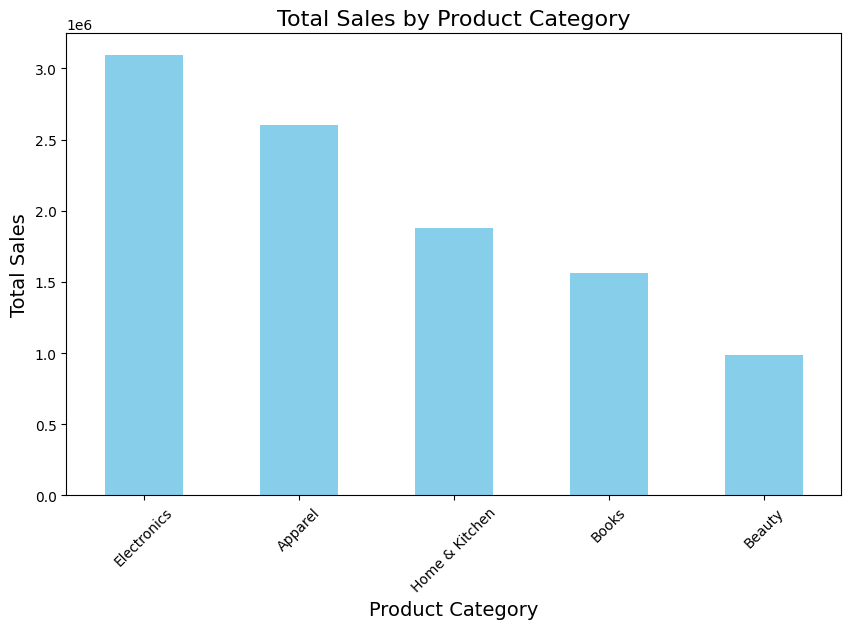

In [11]:
data['TotalSales'] = data['ProductPrice'] * data['QuantityPurchased']
category_sales = data.groupby('ProductCategory')['TotalSales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Product Category", fontsize=16)
plt.ylabel("Total Sales", fontsize=14)
plt.xlabel("Product Category", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Monthly Sales Trend

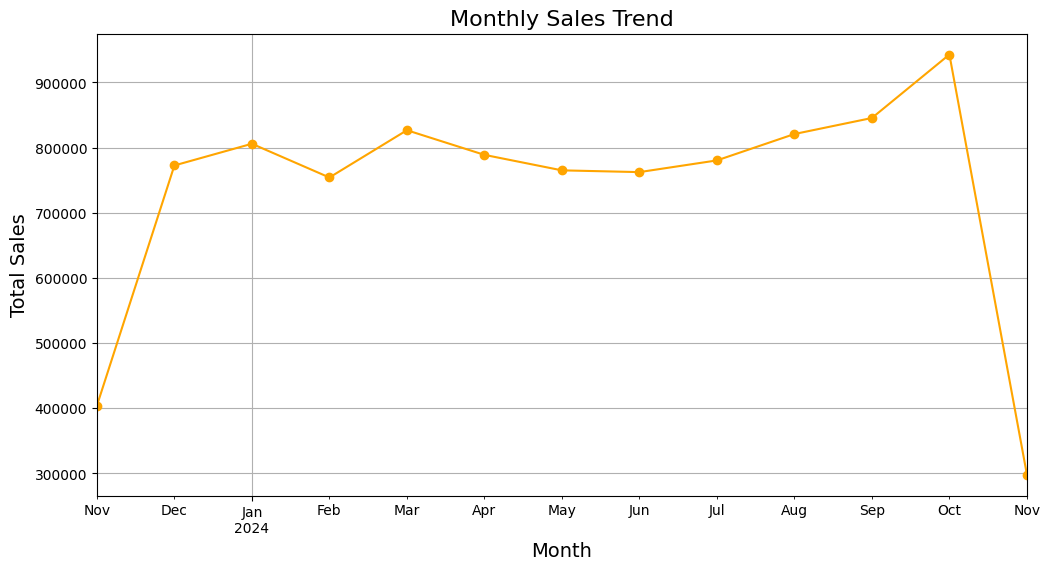

In [12]:
data['Month'] = data['PurchaseDate'].dt.to_period('M')

monthly_sales = data.groupby('Month')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='orange')
plt.title("Monthly Sales Trend", fontsize=16)
plt.ylabel("Total Sales", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.grid()
plt.show()

### Customer Age Disrtibution

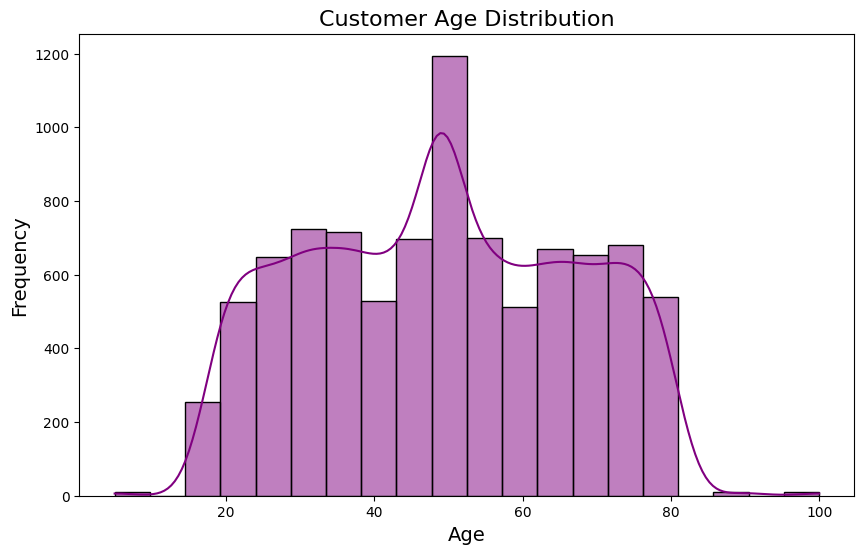

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CustomerAge'], bins=20, kde=True, color='purple')
plt.title("Customer Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

## Key Insights

### Top 5 products by Total Sales

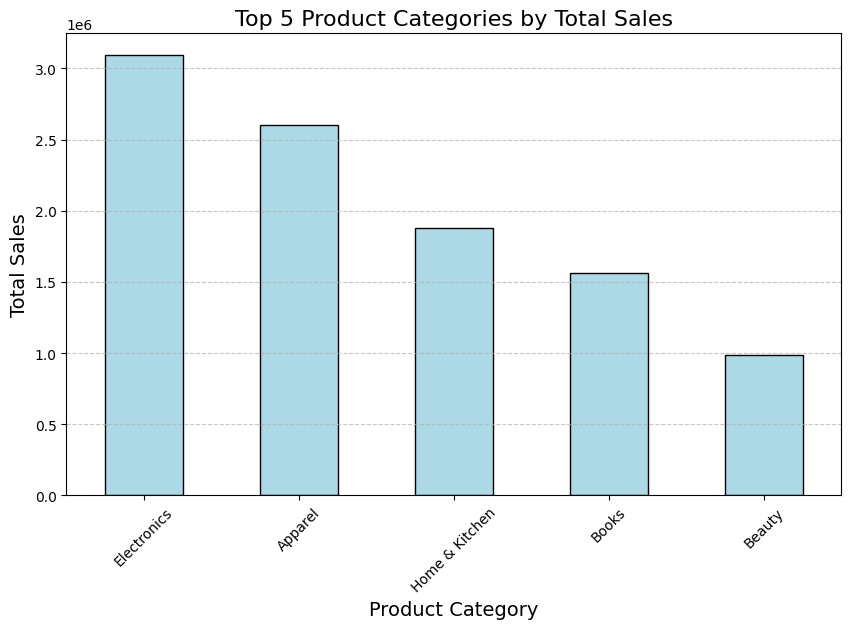

In [14]:
top_products = data.groupby('ProductCategory')['TotalSales'].sum().sort_values(ascending=False).head(5)


plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Top 5 Product Categories by Total Sales", fontsize=16)
plt.ylabel("Total Sales", fontsize=14)
plt.xlabel("Product Category", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Avverage Order value by Payment Method

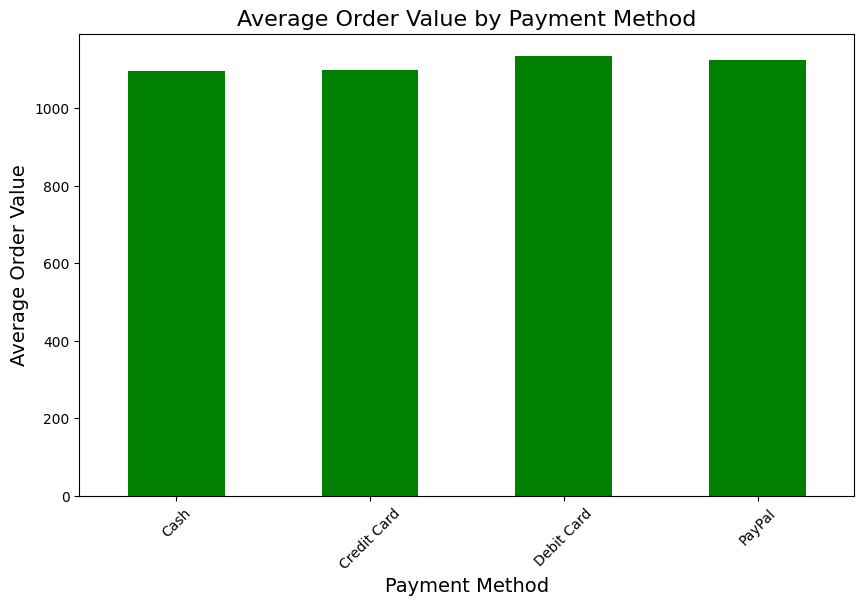

In [15]:
payment_analysis = data.groupby('PaymentMethod')['TotalSales'].mean()

plt.figure(figsize=(10, 6))
payment_analysis.plot(kind='bar', color='green')
plt.title("Average Order Value by Payment Method", fontsize=16)
plt.ylabel("Average Order Value", fontsize=14)
plt.xlabel("Payment Method", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Most Popular Payment Method

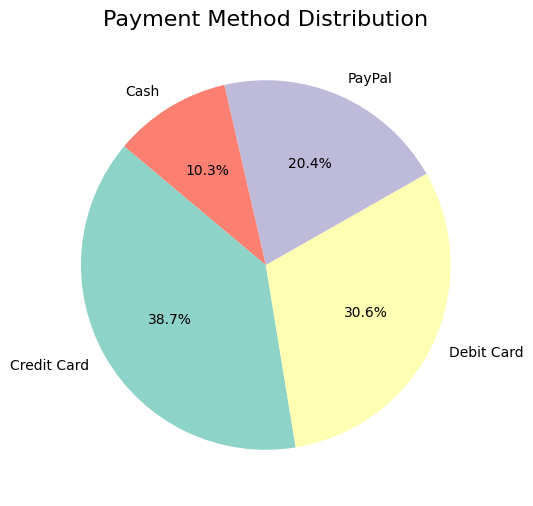

In [16]:
payment_method_counts = data['PaymentMethod'].value_counts()

plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Payment Method Distribution", fontsize=16)
plt.ylabel("")  # Remove y-axis label
plt.show()

### Monthly quantity purchased by product category

<Figure size 1400x800 with 0 Axes>

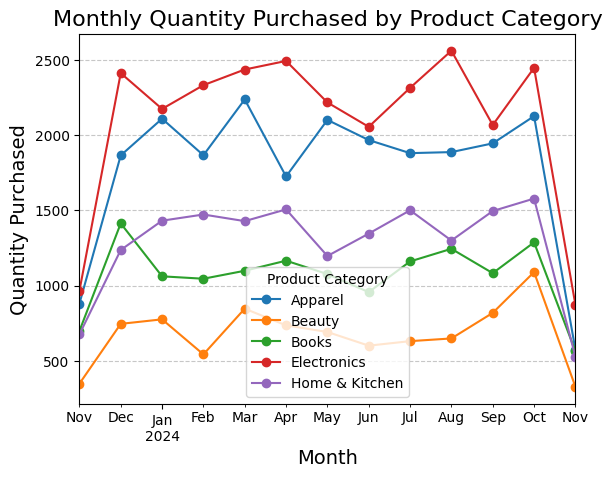

In [17]:
monthly_category_quantity = data.groupby([data['PurchaseDate'].dt.to_period('M'), 'ProductCategory'])['QuantityPurchased'].sum().unstack()

plt.figure(figsize=(14, 8))
monthly_category_quantity.plot(marker='o')
plt.title("Monthly Quantity Purchased by Product Category", fontsize=16)
plt.ylabel("Quantity Purchased", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Product Category")
plt.show()